In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


In [3]:
# get the data

concrete_dataframe = pd.read_csv("https://raw.githubusercontent.com/alexander-one/portfolio/main/Project%20-%20Concrete%20Strength%20ML/assets/Concrete_Data.csv")

In [4]:
# make sure it loaded
concrete_dataframe.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
#looking to make sure the datatypes are all non-categorical
concrete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# split the data into train and test
train_set, test_set = train_test_split(concrete_dataframe, test_size = 0.2, random_state = 42)

In [12]:
# data exploration without messing with the original train_set
concrete = train_set.copy()

In [14]:
#Pearson's r
corr_matrix = concrete.corr()

# remove redundancy in the heatmap about to come up
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

<AxesSubplot:>

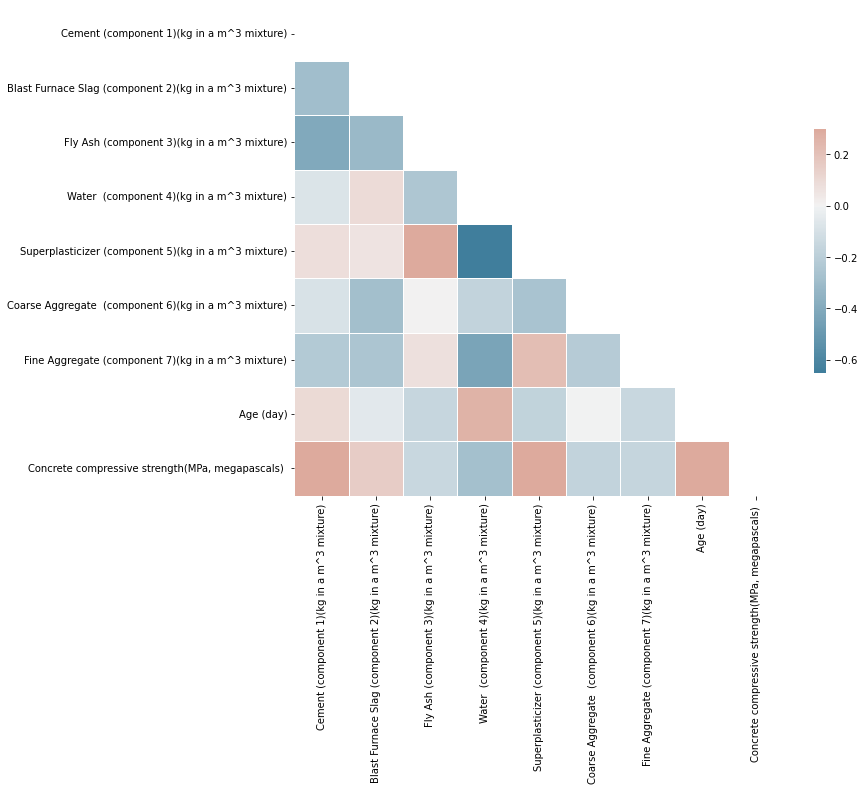

In [15]:
#produce a visual of the correlation between features
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending = False)

There appears to be a lot of correlation between superplasticizer and several other variables. Let's take superplasticizer, age, water, fine aggregate, and compressive strength and see what the trends are. 